In [164]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway,chi2_contingency,shapiro,levene,ttest_ind,ttest_1samp,normaltest,spearmanr,pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# BUSINESS PROBLEM-1

In [2]:
df=pd.read_csv("LoansData.csv")

In [3]:
df.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [5]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [6]:
df=pd.read_csv("LoansData.csv")
    
df['Interest.Rate']=df['Interest.Rate'].apply(lambda x: float(x[:-1]) if isinstance(x,str) else x)

## 1. Loan amount vs Interest rate



### Investigating the variables

In [29]:
corr_df=df[['Amount.Requested','Interest.Rate']].dropna(axis=0)

In [30]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Amount.Requested  2498 non-null   float64
 1   Interest.Rate     2498 non-null   float64
dtypes: float64(2)
memory usage: 58.5 KB


<Axes: xlabel='Interest.Rate', ylabel='Amount.Requested'>

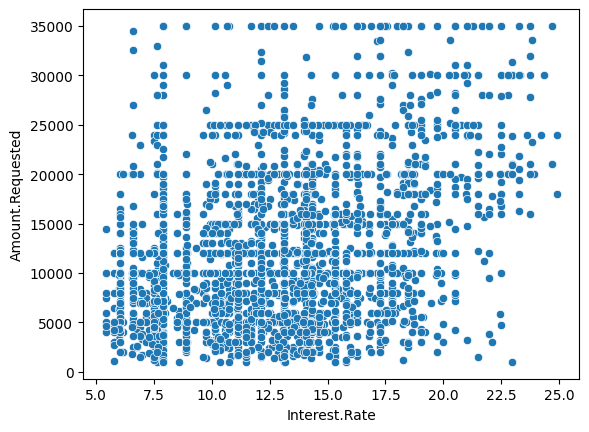

In [162]:
sns.scatterplot(data=corr_df,x='Interest.Rate', y='Amount.Requested')
'''We can see that the two variables have very scattered distrubution hence unable to fulfill the condition of linearity 
 hence cannot use pearson correlation analysis.'''

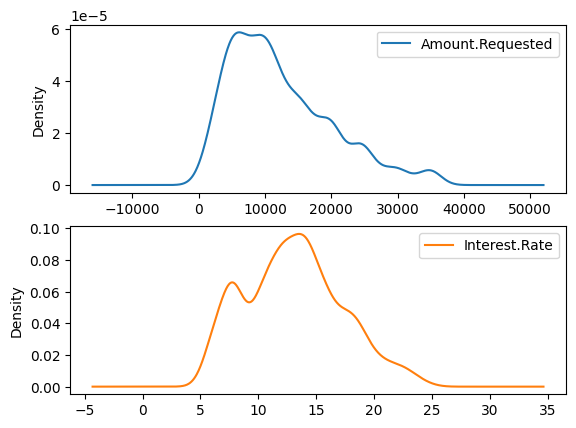

(ShapiroResult(statistic=0.9808695912361145, pvalue=7.788139559300108e-18),
 ShapiroResult(statistic=0.9271952509880066, pvalue=3.253653385034902e-33))

In [163]:
'''Also the two columns do not follow normal distribution as well. '''
corr_df.plot(kind='kde',subplots=True,sharex=False)
plt.show()
shapiro(corr_df['Interest.Rate']),shapiro(corr_df['Amount.Requested'])

Therefore spearman correlation technique which does not rely on normality, lnearity,less sensitive to outliers is a best fit for our data.

### Spearman Correlation Analysis
#### Ho: no relationship
#### Ha: There is significant relationship between IR and AR 

In [165]:
spearman_corr, p_value = spearmanr(corr_df['Interest.Rate'], corr_df['Amount.Requested'])

print("Spearman's correlation coefficient:", spearman_corr)
print("P-value:", p_value)

Spearman's correlation coefficient: 0.284446419898028
P-value: 1.0430231267879115e-47


We reject null as p is lower than 0.05. so basically we have sufficient evidence against the null to conclude that there is significant correlation between the interest rate and amount requested.

The positive sign of corr coeff means in our lending club, if the requested amount increases the interest rate also increases but not by a constant rate and vice versa. Although this does not include an important factor like time/loan_length for which the borrower borrowed the money. 


## 2. Loan length is directly effecting intrest rate.

In [173]:
LL_IR=df[['Loan.Length','Interest.Rate']].dropna(axis=0)

In [174]:
LL_IR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Loan.Length    2498 non-null   object 
 1   Interest.Rate  2498 non-null   float64
dtypes: float64(1), object(1)
memory usage: 58.5+ KB


In [175]:
LL_IR['Loan.Length'].value_counts()

36 months    1950
60 months     548
Name: Loan.Length, dtype: int64

### Two Independent Samples t test 

#### Ho: Avg interest rate for 36 month LL is same as Avg IR for 60 month LL       ------>  Mu_36 == Mu60
#### Ha: Avg IR for 36 month LL is not equal to Avg IR for 60 month LL             ------> Mu_36 != Mu 60

In [190]:
''' The hypothesis is designed such that if we fail to reject null it would indicate LL does not directly affect IR.
     And if we reject null then it would indicate the LL does not directly affects IR.
'''

'''It is a two tailed, 2 ind sample t test '''
'''
Assumptions: 
- Normality of both samples  [shapiro wilk used]
- independence of observations
- Homoscedasticity [levene test used] 
- random sampling
'''

pop_LL_36=LL_IR.loc[LL_IR['Loan.Length']>"36 month",'Interest.Rate']
pop_LL_60=LL_IR.loc[LL_IR['Loan.Length']>"60 month",'Interest.Rate']

sample_36= pop_LL_36.sample(50)
sample_60=pop_LL_60.sample(50)

In [198]:
# Perform the Shapiro-Wilk for normality check of our samples
shapiro_LL_36 = shapiro(sample_36)
shapiro_LL_60 = shapiro(sample_60)

print("Shapiro-Wilk test for desktop users:", shapiro_LL_36)
print("Shapiro-Wilk test for mobile users:", shapiro_LL_60)

'''Normality proved'''

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.977155327796936, pvalue=0.43920600414276123)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.984199583530426, pvalue=0.7367230653762817)


'Normality proved'

In [195]:
#  Performing Levene test for homogeniety of variances between samples
print(levene(sample_36,sample_60))

''' sample variances have homogeneity'''

LeveneResult(statistic=0.3598661626689996, pvalue=0.5499651454729881)


' sample variances have homogeneity'

In [196]:
t_stat,p_value= ttest_ind(sample_36,sample_60)

print("t_statistic:",t_stat)
print("p_value:", p_value)

t_statistic: -2.3644345961783007
p_value: 0.020028980347366537


Since p is lower than significance level of 0.05 hence we reject the null i.e we have sufficient evidence based on our data (random sample) to conclude that
statistically on significance level of 0.05 there is no significant effect of Loan length on Interest rate.

## 3. Inrest rate varies for different purpose of loans

In [203]:
LP_IR=df[['Interest.Rate','Loan.Purpose']].dropna(axis=0)

In [209]:
LP_IR['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            443
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 38
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [213]:
'''Since the distribution in groups is highly imbalanced therefore i made these three grps'''

personal= ['debt_consolidation', 'credit_card', 'medical', 'moving', 'vacation', 'house']
investment= ['home_improvement', 'major_purchase', 'car', 'wedding']
business= ['small_business', 'educational', 'renewable_energy','other']

grp1_P=LP_IR[LP_IR['Loan.Purpose'].isin(personal)]['Interest.Rate']
grp2_I=LP_IR[LP_IR['Loan.Purpose'].isin(investment)]['Interest.Rate']
grp3_B=LP_IR[LP_IR['Loan.Purpose'].isin(business)]['Interest.Rate']

print(grp1_P.shape,grp2_I.shape,grp3_B.shape)
'''so now i can do anova or f_onway test.'''

(1850,) (341,) (307,)


'so now i can do anova or f_onway test.'

In [229]:
'''Normality check for each grp'''
samp1=grp1_P.sample(60)
samp3=grp3_B.sample(60)
shapiro(samp1),shapiro(samp3)

(ShapiroResult(statistic=0.9623202085494995, pvalue=0.06112998351454735),
 ShapiroResult(statistic=0.9629769325256348, pvalue=0.0658465027809143))

In [236]:
samp2=grp2_I.sample(60)
shapiro(samp2)
'''So all the three samples follow normal distribution as per shapiro test'''

ShapiroResult(statistic=0.962070882320404, pvalue=0.059430476278066635)

In [240]:
'''hogeniety of varainces test'''
levene(samp1,samp2,samp3)
'''Done'''

LeveneResult(statistic=0.17290497270966246, pvalue=0.8413594624330217)

### Ho: the three grps have same avg interest rate
### Ha: atleast one of the three grp has significantly different avg interest rate than the rest i.e  IR varies with diff purpose of loans

In [241]:
'''Anova test to check'''
f_oneway(samp1,samp2,samp3)

F_onewayResult(statistic=5.954839210016527, pvalue=0.0031414966493818917)

So we reject the null as p is lower than 0.05 i.e there is sufficient evidence to conclude that atleast one grp's avg IR is significantly differet from the rest i.e the interest rate does varies with different purpose of loans.

## 4. There is relationship between FICO scores and Home Ownership.

In [244]:
FR_HO=df[['FICO.Range',"Home.Ownership"]].dropna(axis=0)

In [249]:
FR_HO['Home.Ownership'].value_counts()


MORTGAGE    1146
RENT        1145
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [251]:
# Excluding the 'NONE' and 'OTHER' category as they seem irrelevant against the other three 
# categories so that we can comment on the relationship in a more generalized way

FR_HO= FR_HO[~FR_HO['Home.Ownership'].isin(['OTHER','NONE'])]
FR_HO['Home.Ownership'].value_counts()

MORTGAGE    1146
RENT        1145
OWN          200
Name: Home.Ownership, dtype: int64

In [252]:
'''FICO range is a spectrum of credit score generated by a fico scoring model. 
   This score tells the creditworthiness of a borrower and help the lender to make decision based on applicant's fico score.
This score is generally categorize is 5 groups:

800-850: excelent
applicants with excellent credit history and considered very low credit risks by lenders.

740-799: very good
applicants with very good credit management habits. 

670-739: good
applicants indicating responsible credit usage.

580-669: fair
applicants in this range have some credit issues or weaknesses in the credit history.

300-579: poor
applicants in this range indicate significant credit problems and pose high credit risks for lenders.
   '''

'''Our dataset has minimum score of 640,
   640-669 - fair
   670-739 - good
   740-799 - very good
   800-834 - excellent
'''

'Our dataset has minimum score of 640,'

In [258]:
def categorize_fico_range(score_range):
    min_score = int(score_range.split('-')[0])  # Extract minimum score from range
    if min_score >= 640 and min_score <= 669:
        return 'fair'
    elif min_score >= 670 and min_score <= 739:
        return 'good'
    elif min_score >= 740 and min_score <= 799:
        return 'very good'
    elif min_score >= 800 and min_score <= 834:
        return 'excellent'
    else:
        return 'Other'  # Handle ranges outside the specified categories

# Apply the function to create a new column for the FICO score categories
FR_HO['FICO_category'] = FR_HO['FICO.Range'].apply(categorize_fico_range)


In [259]:
FR_HO['FICO_category'].value_counts()

good         1755
very good     415
fair          282
excellent      39
Name: FICO_category, dtype: int64

In [263]:
observed_freq=pd.crosstab(FR_HO['FICO_category'],FR_HO['Home.Ownership'])

### Ho: The fico score has no relationship with home ownership status of applicant
### Ha: The fico score has significant relationship with home ownership status of applicant

In [264]:
chi_stat,p_value,dof,expected_freq= chi2_contingency(observed_freq)
print("chi_statistic:",chi_stat)
print("p_value:",p_value)

chi_statistic: 73.50321336256083
p_value: 7.800555348378877e-14


So we reject null as p value is lower than significance level of 0.05. 

We found sufficient evidence against the null to conclude that the fico score of an applicant highly depends on home ownership status of the applicant.

In [265]:
observed_freq.values-expected_freq
'''The huge difference in expected and observed frequency is also clearly visible here as well'''

array([[  7.05780811,   3.86872742, -10.92653553],
       [-34.73584906,  13.35849057,  21.37735849],
       [-23.39863509, -22.90726616,  46.30590124],
       [ 51.07667603,   5.68004817, -56.75672421]])

# BUSINESS PROBLEM-2

In [336]:
df=pd.read_csv('Price_Quotes.csv')
df.head()

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129


## Two Independent sample t test 

### Ho: The avg price quotes provided by marry and barry is same
### Ha: The avg price quotes provided by marry and barry is significantly different



In [268]:
'''Assumptions
- independence: the price quotes provided by barry and marry are independent of one another although the orders given to both are same.
- normality
- homogeneity of variances
- random sampling (assuming the given orders were randomly picked by the manager before giving them to the pricing experts )

'''

# Normality
shapiro(df['Barry_Price']),shapiro(df['Mary_Price'])

'''Perfectly normal'''

(ShapiroResult(statistic=0.9011965990066528, pvalue=0.1643606424331665),
 ShapiroResult(statistic=0.971805214881897, pvalue=0.9287636876106262))

In [274]:
# Homogeneity of variances in samples
from scipy.stats import bartlett
bartlett(df['Barry_Price'],df['Mary_Price'])
'''Using bartlett test for normally distributed samples to check their homogeniety in variances.
   It can be seen it is close to 0.05 lets just assume we reduce the type-1 error i.e reducing alpha to 0.04 for this test ...
   
   So it is safe to say the samples variance are nearly similar.'''

BartlettResult(statistic=3.893224689206556, pvalue=0.04848125267391625)

In [275]:
ttest_ind(df['Barry_Price'],df['Mary_Price'])

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118288)

So p is higher than significance level of 0.05 hence **we fail to reject null** i.e As per the given sample of data we could not find sufficient evidence to conclude that the avg price quotes given by mary and barry are significantly different from each other.

# BUSINESS PROBLEM-3

In [278]:
df=pd.read_csv('Treatment_Facility.csv')

In [335]:
df.head()

,Month,Reengineer,Employee_Turnover,TRFF(%),CI(%)
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


## Lets check if critical incident rate [CI (%)] reduced post reengineering

In [310]:
prior=df[df['Reengineer']=='Prior']['CI(%)']
post=df[df['Reengineer']=='Post']['CI(%)']

###  Two  independent sample t test
#### Ho: the avg CI post reengineering is same as prior reengineering 
#### Ha: the avg CI post reengineering is lower than prior to reengineering

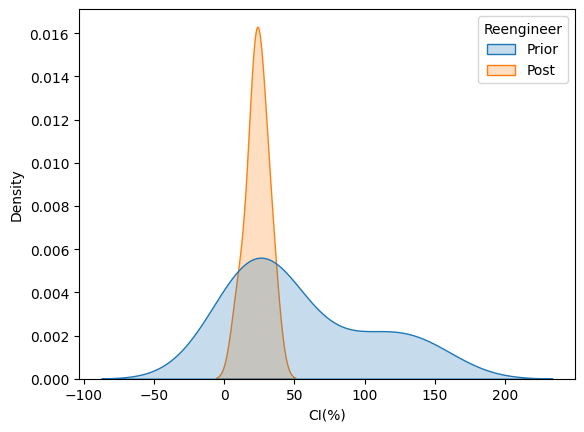

Post sample result: ShapiroResult(statistic=0.9772419929504395, pvalue=0.9451124668121338) 
 Prior sample result: ShapiroResult(statistic=0.8546788096427917, pvalue=0.032799132168293)


In [312]:

'''Normality of samples'''
sns.kdeplot(x=df['CI(%)'],hue=df['Reengineer'],fill=True)
plt.show()
print("Post sample result:",shapiro(post),"\n","Prior sample result:",shapiro(prior))

Post sample is normal but prior sample is not normal on the same significance level of 0.05. Lets just reduce the alpha level for the sake of prior sample's normality to be true.

In [313]:
"Homogeneity"
levene(post,prior)


LeveneResult(statistic=4.116782220350296, pvalue=0.05751543805389061)

Hence variances of samples are same or follows homogeneity

In [323]:
ttest_ind(post,prior, alternative='less')

Ttest_indResult(statistic=-1.6279144254454363, pvalue=0.06045994593954246)

The p value more than 0.05 indicates **we fail to reject null** i.e we got insuffienct evidence  at the significance level of 0.05 to conclude that the post avg CI is lower than prior avg CI. 

## Lets check if there is any impact of reengineering on employee turnover rate

### 2 indep sample t test

#### Ho: the avg employee turnover rate is same post and prior reengineering
#### Ha: the post reengineer avg employee turnover rate is lower than prior reengineering

In [324]:
prior=df[df['Reengineer']=='Prior']['Employee_Turnover']
post=df[df['Reengineer']=='Post']['Employee_Turnover']

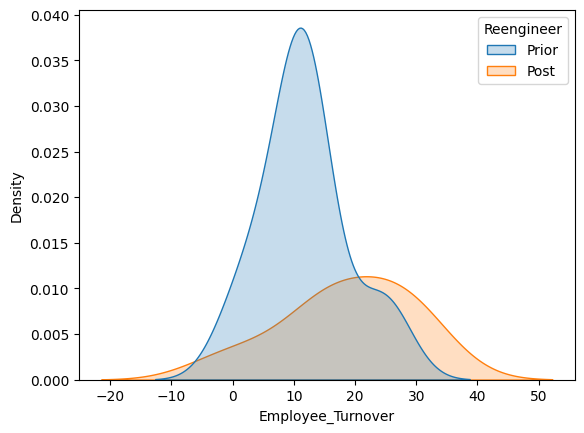

Post sample result: ShapiroResult(statistic=0.9313627481460571, pvalue=0.5625482201576233) 
 Prior sample result: ShapiroResult(statistic=0.9295834302902222, pvalue=0.3365696668624878)


In [325]:

'''Normality of samples'''
sns.kdeplot(x=df['Employee_Turnover'],hue=df['Reengineer'],fill=True)
plt.show()
print("Post sample result:",shapiro(post),"\n","Prior sample result:",shapiro(prior))

Normality condition fulfilled by the samples

In [326]:
"Homogeneity"
levene(post,prior)

LeveneResult(statistic=1.6217509361752593, pvalue=0.21904817055355738)

Hence variances of samples are same or follows homogeneity

In [329]:
ttest_ind(post,prior, alternative='less')

Ttest_indResult(statistic=1.770306704753604, pvalue=0.9531944532723235)

The p value more than 0.05 indicates **we fail to reject null** i.e we got insuffienct evidence  at the significance level of 0.05 to conclude that the post avg Employee turnover is lower than prior avg employee turnover. 

## Lets check if there is any impact of reengineering on TRFF rate


### 2 indep sample t test

#### Ho: the avg  TRFF rate is same as post and prior reengineering
#### Ha: the post reengineer avg TRFF rate is lower than prior reengineering

In [330]:
prior=df[df['Reengineer']=='Prior']['TRFF(%)']
post=df[df['Reengineer']=='Post']['TRFF(%)']

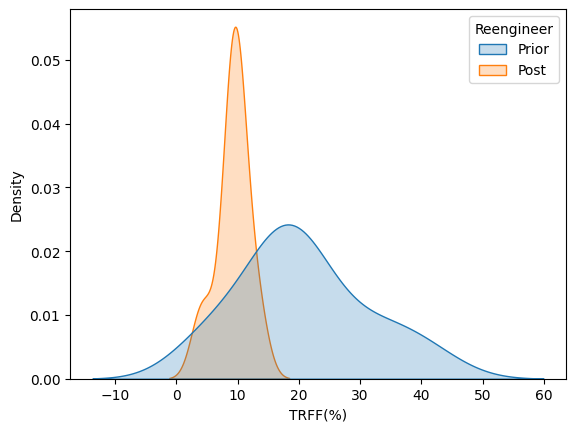

Post sample result: ShapiroResult(statistic=0.8776244521141052, pvalue=0.2161104679107666) 
 Prior sample result: ShapiroResult(statistic=0.9447357058525085, pvalue=0.5210630893707275)


In [331]:

'''Normality of samples'''
sns.kdeplot(x=df['TRFF(%)'],hue=df['Reengineer'],fill=True)
plt.show()
print("Post sample result:",shapiro(post),"\n","Prior sample result:",shapiro(prior))

Normality true

In [332]:
"Homogeneity"
levene(post,prior)

LeveneResult(statistic=4.080704308073863, pvalue=0.05851406317031286)

Homogeniety true as well

In [333]:
ttest_ind(post,prior, alternative='less')

Ttest_indResult(statistic=-2.7833984490618215, pvalue=0.006132541066987138)

The p value more than 0.05 indicates **we reject null** i.e we got suffienct evidence at the significance level of 0.05 to conclude that the post avg TRFF rate is lower than prior avg TRFF rate.



In [334]:
'''Conclusions

Even though the average of TRFF (monthly residents removed or send back to jail percentage), is found to be statistically lower
than that of prior to reengineering program but the avg of CI (monthly critical incidents percentage ) is not. 
It may be worth further investigating the data and looking at other internal factors that could be influencing the results.

'''

'Conclusions\n\nEven though the average of TRFF (monthly residents removed or send back to jail percentage), is found to be statistically lower\nthan that of prior to reengineering program but the avg of CI (monthly critical incidents percentage ) is not. \nIt may be worth further investigating the data and looking at other internal factors that could be influencing the results.\n\n'

# BUSINESS PROBLEM-4

In [339]:
df=pd.read_csv('Priority_Assessment.csv')
df.shape

(642, 2)

In [341]:
df['Priority'].value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [382]:
high=df[df['Priority']=='High']['Days']
med=df[df['Priority']=='Medium']['Days']
low=df[df['Priority']=='Low']['Days']

In [383]:
high.size,med.size,low.size

(326, 249, 67)

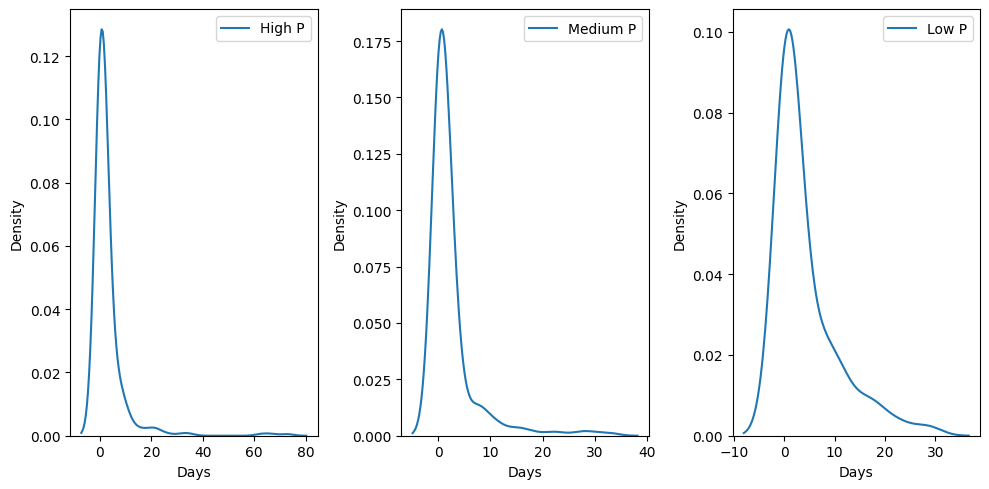

In [384]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(10,5))
sns.kdeplot(x=high,ax=axes[0],label='High P')
axes[0].legend()
sns.kdeplot(x=med,ax=axes[1],label='Medium P')
axes[1].legend()
sns.kdeplot(x=low,ax=axes[2],label='Low P')
axes[2].legend()
plt.tight_layout()
plt.show()


All the three priority's dist is right skewed where tailed events (say more than 10 days) probability is highest in low P jobs which looks reasonable as compared to the jobs in High P and Medium P. So judging by this (in our tests) we may find significant difference in avg days taken in completing the jobs between the given three priorities. 

In [409]:
high.skew(),med.skew(),low.skew()   


'''The three distributions of our samples are very highly right skwed thats why it seems inappropriate to do '''

(6.047527730395666, 3.7045884723784877, 1.9784202590631779)

In [410]:
shapiro(high),shapiro(med),shapiro(low)

(ShapiroResult(statistic=0.37770068645477295, pvalue=7.042255588156208e-32),
 ShapiroResult(statistic=0.5062036514282227, pvalue=7.518808932472392e-26),
 ShapiroResult(statistic=0.6979364156723022, pvalue=1.8875445650934353e-10))

## Kruskal Wallis test

- This test is a non parametric test and is used when the samples does not follow normal distribution hence an alternative for one way anova test.

### Ho: The avg time taken to complete job in each priority group is same.
### Ha: The avg time taken to complete job in atleast one of the three groups is significantly diffeent from the rest.

In [411]:
kruskal(high,med,low)  

KruskalResult(statistic=6.992834934929302, pvalue=0.030305760547285312)

The p is lower than significance level so **we reject null** i.e we have sufficient evidence to conclude that atleast one of the priority avg is significantly different from the rest of the priority avg. 

The same outcome as i mentioned below the kde plots of the three priorities.

Now we will do post-hoc tests to comment on how the avg of the three grps differ from each other i.e we will do pairwise one tailed hypothesis testing to find out. 

## Mann-Whitney U test

- This test is an alternative for t test for independent variables as it does not rely on normality condition as well. 

### Ho: There is no difference in the distribution of completion time between A category of jobs and B category of jobs.
### Ha: The distribution of completion time for A category of jobs tends to be lower than the distribution of completion time for B category of jobs.

In [416]:
from scipy.stats import mannwhitneyu

## PAIRWISE TESTING THE SAMPLES
 
# High vs Medium
print("High Vs Medium:",mannwhitneyu(high,med,alternative='less'))
print("p is higher than 0.05 we fail to reject null i.e we conclude time taken in High jobs is similar/same as time taken in Medium jobs","\n")
# High vs Low
print("High vs Low:",mannwhitneyu(high,low,alternative='less'))
print("p is lower than 0.05 we reject null i.e we conclude time taken in High jobs is significantly lower than the time taken in Low jobs","\n")
# Medium vs Low
print("Medium Vs Low:",mannwhitneyu(med,low,alternative='less'))
print("p is lower than 0.05, we reject null i.e we conclude time taken in Medium jobs is significantly lower than the time taken in Low jobs","\n")



High Vs Medium: MannwhitneyuResult(statistic=40058.0, pvalue=0.393953948888218)
p is higher than 0.05 we fail to reject null i.e we conclude time taken in High jobs is similar/same as time taken in Medium jobs 

High vs Low: MannwhitneyuResult(statistic=8773.0, pvalue=0.005447532993802295)
p is lower than 0.05 we reject null i.e we conclude time taken in High jobs is significantly lower than the time taken in Low jobs 

Medium Vs Low: MannwhitneyuResult(statistic=6723.0, pvalue=0.007181971596956215)
p is lower than 0.05, we reject null i.e we conclude time taken in Medium jobs is significantly lower than the time taken in Low jobs 



Expected: High< Medium < Low

Statistically Observed: High ~ Medium, High < Low, Medium < Low

We can say that there is significant impact of the prioritization system implemented by the manager.


# BUSINESS PROBLEM-5

In [419]:
df=pd.read_csv('Films.csv')

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


## 1. What is the overall level of customer satisfaction?

In [427]:
temp=df[['Sinage','Parking','Clean','Overall']].mean()

Overall_satisfaction_level= temp.mean()
Overall_satisfaction_level

1.7352758820019394

In [476]:
'''The overall customer satisfaction level is very low and almost all the survey question's avg scores are lower than 2 as well. '''

"The overall customer satisfaction level is very low and almost all the survey question's avg scores are lower than 2 as well. "

## 2. What factors are linked to satisfaction?

<Axes: >

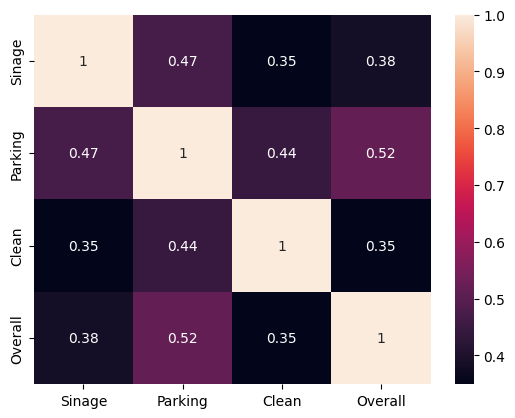

In [441]:
sns.heatmap(df[['Sinage', 'Parking',
       'Clean', 'Overall']].corr(),annot=True)

It can be seen that overall satisfaction score highly and positively correlates with Parking score followed by sinage and cleanliness.

## 3. What is the demographic profile of Film on the Rocks patrons?

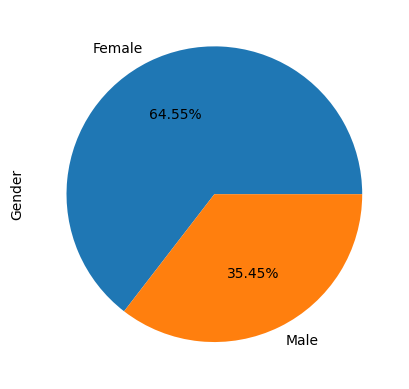

In [446]:
# Gender
df.loc[df.Gender=='1','Gender'] = 'Male'
df.loc[df.Gender=='2','Gender'] = 'Female'

df.Gender.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

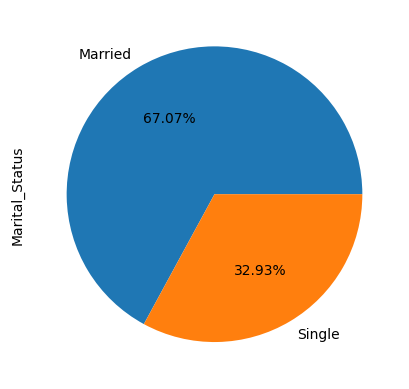

In [452]:
df.loc[((df.Marital_Status=='1') | (df.Marital_Status=='Slngle')),'Marital_Status']='Single'
df.loc[df.Marital_Status=='2','Marital_Status']='Married'

# Marital Status
df.Marital_Status.value_counts().plot(kind = 'pie', autopct = '%0.2f%%')
plt.show()

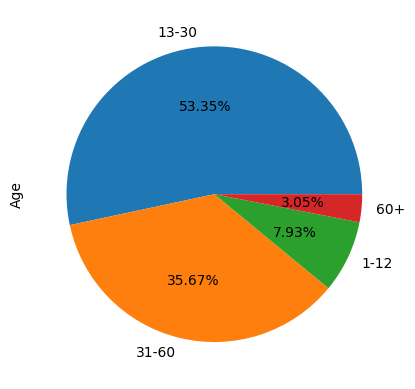

In [456]:
# AGE
df.Age.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', labels=['13-30','31-60','1-12','60+'])
plt.show()

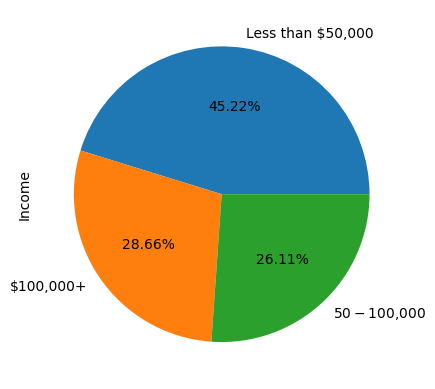

In [455]:
# Income
df.Income.value_counts().plot(kind = 'pie', autopct = '%0.2f%%', labels = ['Less than $50,000','$100,000+','$50-$100,000'])
plt.show()


## 4. In what media outlet(s) should the film series be advertised?

<Axes: ylabel='Hear_About'>

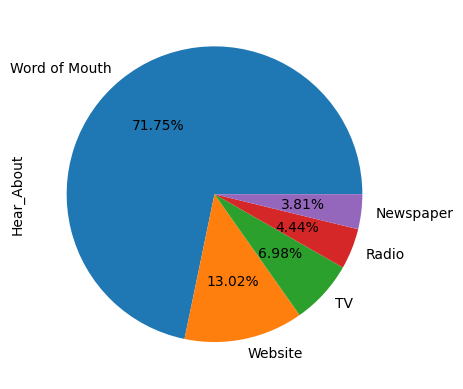

In [475]:
df.loc[df['Hear_About'].isin(['1','2','3','4','5'])]['Hear_About'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%',labels=['Word of Mouth','Website','TV','Radio','Newspaper'])